In [1]:
!pip install matplotlib
!pip install plotly
!pip install sklearn
!pip install joblib
!pip install dask[dataframe]

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
import inspect
from joblib import dump, load
import random
import os
import dask.dataframe as dd
import requests
from time import time
from datetime import date, datetime

In [4]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, \
                            mean_squared_error, roc_auc_score

from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

In [5]:
import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings

In [6]:
np.random.seed(2000)

In [7]:
notebook_dir = os.getcwd()
notebook_dir

'C:\\Users\\luxur\\Documents\\Stats-404-W19-Statistical-Computing\\Kickstarter'

In [8]:
# used dask to read csv to speed up
t0 = time()
df = dd.read_csv("../Kickstarter/ks-projects-201801.csv",
                 encoding='ISO-8859-1'
                 )
t1 = time()
print ((t1 - t0) , 'seconds')

0.02898240089416504 seconds


In [12]:
# use pandas functions
df = df.compute()

In [13]:
df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,620302213,LOVELAND Round 6: A Force More Powerful,Conceptual Art,Art,USD,12/4/2009,0.01,11/25/2009,100.0,successful,6,US,100.00,100.00,0.01
1,688564643,"Word-of-mouth publishing: get ""Corruptions"" ou...",Fiction,Publishing,USD,12/13/2011,0.01,11/7/2011,0.0,canceled,0,US,0.00,0.00,0.01
2,9572984,Nana,Shorts,Film & Video,USD,3/16/2012,0.15,1/25/2012,0.0,failed,0,US,0.00,0.00,0.15
3,1379346088,Bug's Big Adventure: Mexico Edition,Art,Art,MXN,11/12/2016,10.00,11/11/2016,335.0,successful,7,MX,18.05,16.41,0.49
4,219760504,RocknRoll NoisePollution,Documentary,Film & Video,USD,7/19/2011,0.50,7/12/2011,0.0,failed,0,US,0.00,0.00,0.50
5,69101025,Most percentage funded ever for a Guinness Record,Publishing,Publishing,MXN,6/26/2017,10.00,5/25/2017,9430.0,successful,2,MX,506.87,522.81,0.55
6,843112170,Nothing (Suspended),Comedy,Film & Video,NOK,11/14/2015,5.00,9/30/2015,0.0,suspended,0,NO,0.00,0.00,0.58
7,952551201,Xtreme Champion Tournament Issue #3,Comics,Comics,AUD,11/27/2015,1.00,10/30/2015,1297.0,successful,59,AU,923.80,934.17,0.72
8,1793062138,flying cars (Suspended),Flight,Technology,CAD,2/13/2016,1.00,1/14/2016,0.0,suspended,0,CA,0.00,0.00,0.73
9,741010120,New Soundtracks for your Space Walk,Rock,Music,DKK,10/18/2015,5.00,9/18/2015,145.0,successful,3,DK,21.96,21.54,0.74


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378302 entries, 0 to 115481
Data columns (total 15 columns):
ID                  378302 non-null int64
name                378298 non-null object
category            378302 non-null object
main_category       378302 non-null object
currency            378302 non-null object
deadline            378302 non-null object
goal                378302 non-null float64
launched            378302 non-null object
pledged             378302 non-null float64
state               378302 non-null object
backers             378302 non-null int64
country             378302 non-null object
usd pledged         374509 non-null float64
usd_pledged_real    378302 non-null float64
usd_goal_real       378302 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 46.2+ MB


In [83]:
df.isna().sum()

main_category       0
currency            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
project_length      0
dtype: int64

In [82]:
df[df['name'].isna()].head()

KeyError: 'name'

In [67]:
# previous code ~ 70 seconds
#t0 = time()
#df['project_length'] = (pd.to_datetime(df['deadline']) - pd.to_datetime(df['launched'])).dt.days + 1
#t1 = time()
#print ((t1 - t0) , 'seconds')

68.96393704414368 seconds


In [17]:
# changed launched data from datetime to date in the csv file
# also utilized apply function as well as 
# datetime.strptime.date() which is faster than pd.to_datetime to reduce the time by 4 times
t0 = time()
df['project_length'] = df.apply(lambda row: (datetime.strptime((row['deadline']), "%m/%d/%Y").date()-datetime.strptime((row['launched']), "%m/%d/%Y").date()).days+1, axis=1)
t1 = time()
print ((t1 - t0) , 'seconds')

18.79044532775879 seconds


In [22]:
df[['deadline','launched','project_length']].head(5)

,deadline,launched,project_length
0,12/4/2009,11/25/2009,10
1,12/13/2011,11/7/2011,37
2,3/16/2012,1/25/2012,52
3,11/12/2016,11/11/2016,2
4,7/19/2011,7/12/2011,8


In [24]:
df.shape

(378302, 16)

In [25]:
# use better index for speeding
df.set_index('ID', inplace=True)

In [26]:
# drop unneccesary columns
to_drop = ['name', 'category', 'deadline', 'launched', 'goal', 'pledged', 'usd pledged']
df.drop(to_drop, inplace=True, axis=1)

In [27]:
df.head(10)

,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,project_length
ID,,,,,,,,
620302213,Art,USD,successful,6,US,100.00,0.01,10
688564643,Publishing,USD,canceled,0,US,0.00,0.01,37
9572984,Film & Video,USD,failed,0,US,0.00,0.15,52
1379346088,Art,MXN,successful,7,MX,16.41,0.49,2
219760504,Film & Video,USD,failed,0,US,0.00,0.50,8
69101025,Publishing,MXN,successful,2,MX,522.81,0.55,33
843112170,Film & Video,NOK,suspended,0,NO,0.00,0.58,46
952551201,Comics,AUD,successful,59,AU,934.17,0.72,29
1793062138,Technology,CAD,suspended,0,CA,0.00,0.73,31


In [28]:
df['state'].value_counts()

failed        197522
successful    133833
canceled       38747
undefined       3558
live            2797
suspended       1845
Name: state, dtype: int64

In [29]:
df['main_category'].value_counts()

Film & Video    63533
Music           51864
Publishing      39837
Games           35203
Technology      32542
Design          30038
Art             28124
Food            24577
Fashion         22791
Theater         10898
Comics          10811
Photography     10772
Crafts           8796
Journalism       4748
Dance            3768
Name: main_category, dtype: int64

In [30]:
# Only consider failed or successful projects
# Exclude suspended, cancelled, and other misc states
df = df[(df['state'] == "failed") | (df['state'] == "successful")]


In [31]:
# Select proper features for modeling
# Exclude id, name, dates, other features that are not needed in modeling
df_features = df[['main_category', 'currency', 'state', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'project_length']]

In [32]:
df_features['state'].value_counts()

failed        197522
successful    133833
Name: state, dtype: int64

In [33]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331355 entries, 620302213 to 1243678698
Data columns (total 8 columns):
main_category       331355 non-null object
currency            331355 non-null object
state               331355 non-null object
backers             331355 non-null int64
country             331355 non-null object
usd_pledged_real    331355 non-null float64
usd_goal_real       331355 non-null float64
project_length      331355 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 22.8+ MB


In [34]:
# Modify our dependent variable to 0 or 1
mapping = {'failed': 0, 'successful': 1}
df_features = df_features.replace({'state': mapping})


In [35]:
df_features['state'] = pd.to_numeric(df_features['state'], errors='coerce')

In [36]:
# Categorial columns to numerical using dummy variables
df_features = pd.get_dummies(df_features)

In [37]:
df_features.head(5)

,state,backers,usd_pledged_real,usd_goal_real,project_length,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
ID,,,,,,,,,,,,,,,,,,,,,
620302213,1,6,100.00,0.01,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9572984,0,0,0.00,0.15,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1379346088,1,7,16.41,0.49,2,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
219760504,0,0,0.00,0.50,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69101025,1,2,522.81,0.55,33,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
# Split the data to train and test
df_train, df_valid = train_test_split(df_features,
                                      test_size = 0.25,
                                      random_state=2018)

In [40]:
df_train['state'].value_counts()

0    148174
1    100342
Name: state, dtype: int64

In [41]:
df_valid['state'].value_counts()

0    49348
1    33491
Name: state, dtype: int64

In [42]:
y = df_train['state']
X = df_train.drop(columns=['state'])

In [91]:
y_test = df_valid['state']
X_test = df_valid.drop(columns=['state'])

In [43]:
X.shape

(248516, 56)

In [44]:
y.shape

(248516,)

In [45]:
inspect.signature(RandomForestClassifier)

<Signature (n_estimators='warn', criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)>

In [46]:
### --- Step 1: Specify different number of trees in forest, to determine
###             how many to use based on leveling-off of OOB error:
n_trees = [50, 100, 250, 500, 1000, 1500]

In [47]:
### --- Step 2: Create dictionary to save-off each estimated RF model:
rf_dict = dict.fromkeys(n_trees)

In [49]:
for num in n_trees:
    print(num)
    ### --- Step 3: Specify RF model to estimate:
    rf = RandomForestClassifier(n_estimators=num,
                                min_samples_leaf=30,
                                oob_score=True,
                                random_state=2018,
                                class_weight='balanced',
                                verbose=1,
                                n_jobs=4)
    ### --- Step 4: Estimate RF model and save estimated model:
    rf.fit(X, y)
    rf_dict[num] = rf

50


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    8.6s finished


100


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   16.7s finished


250


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.3s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   41.7s finished


500


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  1.4min finished


1000


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  2.8min finished


1500


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:  4.2min finished


In [50]:
### --- Save-off model:
# Specify location and name of object to contain estimated model:
model_object_path = os.path.join(notebook_dir, 'rf.joblib')
# Save estimated model to specified location:
dump(rf_dict, model_object_path) 


['C:\\Users\\luxur\\Documents\\Stats-404-W19-Statistical-Computing\\Kickstarter\\rf.joblib']

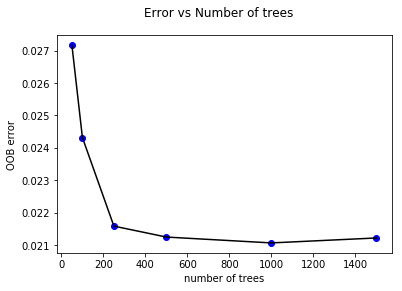

In [85]:
# Compute OOB error 
oob_error_list = [None] * len(n_trees)

# Find OOB error for each forest size: 1000 is the best number
for i in range(len(n_trees)):
    oob_error_list[i] = 1 - rf_dict[n_trees[i]].oob_score_
else:
    # Visulaize result:
    fig = plt.figure()
    plt.plot(n_trees, oob_error_list, 'bo',
             n_trees, oob_error_list, 'k')
    fig.suptitle('Error vs Number of trees')
    plt.xlabel('number of trees')
    plt.ylabel('OOB error')

In [87]:
# Feature importance plot
top_num = 10
forest = rf_dict[1000]
importances = forest.feature_importances_

# Sort in decreasing order:
indices = np.argsort(importances)[::-1]    


In [88]:
len(importances)

56

In [89]:
np.array(list(X))[indices[0:top_num]]

array(['backers', 'usd_pledged_real', 'usd_goal_real', 'project_length',
       'main_category_Technology', 'main_category_Music',
       'main_category_Theater', 'main_category_Food',
       'main_category_Design', 'main_category_Games'], dtype='<U26')

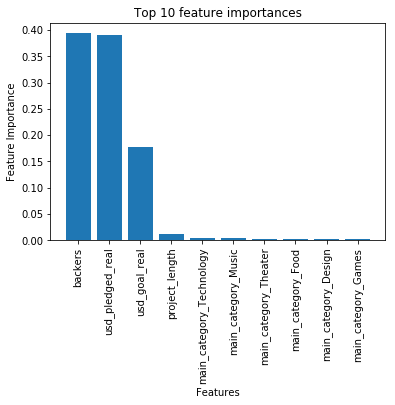

In [90]:
# Plot the feature importances of the forest
ax = plt.gca()
plt.title(f"Top {top_num} feature importances")
plt.bar(range(top_num), importances[indices[0:top_num]])
plt.xticks(range(top_num))
ax.set_xticklabels(np.array(list(X))[indices[0:top_num]], rotation = 90)
ax.set_xlabel("Features")
ax.set_ylabel("Feature Importance")
plt.show()

In [56]:
y_pred_train = forest.predict(X)
y_pred_train[0:5]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   15.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   19.3s finished


array([0, 1, 0, 0, 1], dtype=int64)

In [57]:
conf_mat = confusion_matrix(y_true=y,
                            y_pred=y_pred_train)
conf_mat

array([[144055,   4119],
       [   634,  99708]], dtype=int64)

In [58]:
class_names = ['failed','successful']

In [59]:
conf_df = pd.DataFrame(conf_mat, class_names, class_names)
conf_df

,failed,successful
failed,144055,4119
successful,634,99708


In [60]:
conf_df_pct = conf_df/conf_df.sum(axis=1)
round(conf_df_pct, 2)
# Very Successful results

,failed,successful
failed,0.97,0.04
successful,0.00,0.99


In [61]:
# Class-level performance: 0.9803
f1_score(y_true=y,
         y_pred=y_pred_train,
         average='macro')

0.9802454172725857

In [62]:
# Overall performance across all classes: 0.9809
f1_score(y_true=y,
         y_pred=y_pred_train,
         average='micro')

0.9808744708590191

In [92]:
y_pred_test = forest.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    7.8s finished


In [94]:
conf_mat = confusion_matrix(y_true=y_test,
                            y_pred=y_pred_test)
conf_mat

array([[47819,  1529],
       [  251, 33240]], dtype=int64)

In [102]:
class_names = ['failed','successful']
conf_df = pd.DataFrame(conf_mat, class_names, class_names)
conf_df

,failed,successful
failed,47819,1529
successful,251,33240


In [107]:
conf_df_pct = conf_df/conf_df.sum(axis=0)
round(conf_df_pct, 5)
# Very Successful results

,failed,successful
failed,0.99478,0.04398
successful,0.00522,0.95602


In [99]:
# Class-level performance: 0.978
f1_score(y_true=y_test,
         y_pred=y_pred_test,
         average='macro')

0.9778257287006349

In [100]:
# Overall performance across all classes: 0.979
f1_score(y_true=y_test,
         y_pred=y_pred_test,
         average='micro')

0.9785125363657214

In [64]:
inspect.signature(OneVsRestClassifier)

<Signature (estimator, n_jobs=None)>

In [75]:
# Alternate model: Support Vector Machine
# Used OnvVsRestClassifier to run svm in parallel
t0 = time()
C = 1.0
#svm_linear = svm.SVC(kernel='linear', C=C)
clf = OneVsRestClassifier(svm.SVC(kernel='linear', C=C), n_jobs=4)
#svm_LinearSVC = svm.LinearSVC(C=C)
#svm_rbf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
#svm_poly = svm.SVC(kernel='poly', degree=3, C=C)
#svm_linear.fit(X,y)
#svm_LinearSVC.fit(X,y)
#svm_rbf.fit(X,y)
#svm_poly.fit(X,y)
clf.fit(X,y)
t1 = time()
print ((t1 - t0) , 'seconds')

#571 from rf vs 3568 from svm

3567.7532987594604 seconds


In [76]:
y_pred_train_svm = clf.predict(X)
y_pred_train_svm[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [77]:
conf_mat_svm = confusion_matrix(y_true=y,
                            y_pred=y_pred_train_svm)
conf_mat_svm

array([[148127,     47],
       [     2, 100340]], dtype=int64)

In [78]:
conf_df_svm = pd.DataFrame(conf_mat_svm, class_names, class_names)
conf_df_svm

,failed,successful
failed,148127,47
successful,2,100340


In [79]:
conf_df_pct_svm = conf_df_svm/conf_df_svm.sum(axis=1)
round(conf_df_pct_svm, 2)
# Very Successful results

,failed,successful
failed,1.0,0.0
successful,0.0,1.0


In [80]:
# Overall performance across all classes: 0.99998
f1_score(y_true=y,
         y_pred=y_pred_train_svm,
         average='micro')

0.9998028295964847

In [81]:
# Overall performance across all classes: 0.99998
f1_score(y_true=y,
         y_pred=y_pred_train_svm,
         average='macro')

0.9997952592616351

In [108]:
y_pred_test_svm = clf.predict(X_test)
y_pred_test_svm[0:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [109]:
conf_mat_svm = confusion_matrix(y_true=y_test,
                            y_pred=y_pred_test_svm)
conf_mat_svm

array([[49329,    19],
       [    1, 33490]], dtype=int64)

In [110]:
conf_df_svm = pd.DataFrame(conf_mat_svm, class_names, class_names)
conf_df_svm

,failed,successful
failed,49329,19
successful,1,33490


In [111]:
conf_df_pct_svm = conf_df_svm/conf_df_svm.sum(axis=0)
round(conf_df_pct_svm, 5)
# Very Successful results

,failed,successful
failed,0.99998,0.00057
successful,0.00002,0.99943


In [112]:
# Overall performance across all classes: 0.9998
f1_score(y_true=y_test,
         y_pred=y_pred_test_svm,
         average='micro')

0.9997585678243339

In [113]:
# Overall performance across all classes: 0.99997
f1_score(y_true=y_test,
         y_pred=y_pred_test_svm,
         average='macro')

0.9997494065576775